# Найти на черно-белом изображении наибольший по площади контур, который не является контуром всего изображения. Затем нужно выделить найденный контур на изображении и отобразить результат.

### 1) Импортируем необходимые библиотеки

In [1]:
import cv2
import matplotlib.pyplot as plt

### 2)Загрузим изображение и преобразуем в оттенки серого

In [2]:
image = cv2.imread("circ.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### 3)Применяем бинаризацию для выделения черных кругов. Пороговое значение равно 10.

In [3]:
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

### 4)Найти все контуры на изображении

Находим контуры на изображении с помощью функции findContours. Здесь используется метод RETR_TREE для извлечения всех контуров и иерархии и метод CHAIN_APPROX_SIMPLE для упрощения полученных контуров.

In [4]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### 5)Находим контур с наибольшей площадью в списке контуров с помощью цикла for. Здесь используется функция contourArea, чтобы определить площадь контура.

In [5]:
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    if area > max_area and not (x == 0 and y == 0 and w == image.shape[1] and h == image.shape[0]):
        max_area = area
        max_contour = contour


### 6) Рисуем контур с наибольшей площадью на исходном изображении с помощью функции drawContours.

In [6]:
if max_contour is not None:
    cv2.drawContours(image, [max_contour], -1, (0, 255, 0), 3)

### 7)Отображаем исходное изображение на экране с контуром на нем

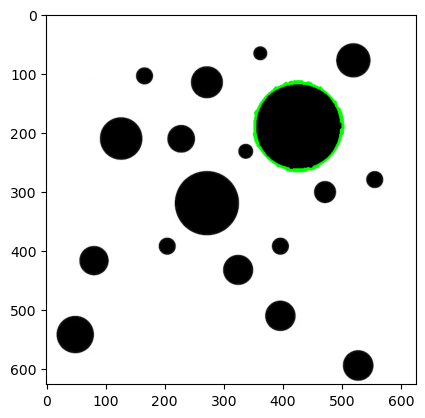

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()